# Heather's Capstone Notebook

In [1]:
import pandas as pd
import numpy as np

import new_wrangle as w
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')


In [2]:
walmart_palette_c = ['#004c91', '#007dc6', '#78b9e7', '#f47321', '#ffc220', '#367c2b', '#76c043']

walmart_palette_d = ['#004c91', '#ffc220' , '#f47321', '#367c2b','#007dc6', '#76c043', '#78b9e7']

sns.set_palette(walmart_palette_d)

sns.color_palette(walmart_palette_d)

[(0.0, 0.2980392156862745, 0.5686274509803921),
 (1.0, 0.7607843137254902, 0.12549019607843137),
 (0.9568627450980393, 0.45098039215686275, 0.12941176470588237),
 (0.21176470588235294, 0.48627450980392156, 0.16862745098039217),
 (0.0, 0.49019607843137253, 0.7764705882352941),
 (0.4627450980392157, 0.7529411764705882, 0.2627450980392157),
 (0.47058823529411764, 0.7254901960784313, 0.9058823529411765)]

In [3]:
sns.color_palette(walmart_palette_c)

[(0.0, 0.2980392156862745, 0.5686274509803921),
 (0.0, 0.49019607843137253, 0.7764705882352941),
 (0.47058823529411764, 0.7254901960784313, 0.9058823529411765),
 (0.9568627450980393, 0.45098039215686275, 0.12941176470588237),
 (1.0, 0.7607843137254902, 0.12549019607843137),
 (0.21176470588235294, 0.48627450980392156, 0.16862745098039217),
 (0.4627450980392157, 0.7529411764705882, 0.2627450980392157)]

In [171]:
# acquire dataset

df = w.wrangle_walmart()

/Users/Heather/codeup-data-science/capstone/new_wrangle.py:65: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = pd.DatetimeIndex(df['Date']).week


In [172]:
df.head()

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,weekday,week_of_year,deflated_series,sales_delta,gas_delta,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42,2.57,211.096,8.106,A,151315,February,2010,1,Friday,5,7786.46,0.0,0.0,Winter,no_holiday
2010-02-05,10,2193048.75,0,54,2.96,126.442,9.765,B,126512,February,2010,1,Friday,5,17344.31,0.0,0.0,Winter,no_holiday
2010-02-05,37,536006.73,0,45,2.57,209.853,8.554,C,39910,February,2010,1,Friday,5,2554.20,0.0,0.0,Winter,no_holiday
2010-02-05,17,789036.02,0,23,2.67,126.442,6.548,B,93188,February,2010,1,Friday,5,6240.30,0.0,0.0,Winter,no_holiday
2010-02-05,30,465108.52,0,39,2.57,210.753,8.324,C,42988,February,2010,1,Friday,5,2206.89,0.0,0.0,Winter,no_holiday


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         6435 non-null   int64  
 1   weekly_sales     6435 non-null   float64
 2   holiday_flag     6435 non-null   int64  
 3   temperature      6435 non-null   int64  
 4   fuel_price       6435 non-null   float64
 5   CPI              6435 non-null   float64
 6   unemployment     6435 non-null   float64
 7   store_type       6435 non-null   object 
 8   store_size       6435 non-null   int64  
 9   month            6435 non-null   object 
 10  year             6435 non-null   int64  
 11  quarter          6435 non-null   int64  
 12  weekday          6435 non-null   object 
 13  week_of_year     6435 non-null   int64  
 14  deflated_series  6435 non-null   float64
 15  sales_delta      6435 non-null   float64
 16  gas_delta        6435 non-null   float64
 

## Add Holiday's to column

Goal: Create variable called `holiday_week` with the name of the holiday. Later will break out into `is_superbowl`, `is_laborday`, `is_christmas` etc. no holiday

### Holiday List

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [5]:
# get value counts of weeks with holidays and weeks without
df.holiday_flag.value_counts()

0    5985
1     450
Name: holiday_flag, dtype: int64

There's already a column called holiday flag. 0 no holiday 1 holiday. Since we already have this information, we need to know which of these weeks belong to what projects. 

In [6]:
# OOOHHH Those weeks are already there. So Need to filter for those 

christmases = ['2010-12-31', '2011-12-30', '2012-12-28']

super_bowls = ['2010-02-12', '2011-02-11', '2012-02-10']

labor_days = ['2010-09-10', '2011-09-09', '2012-09-07']

thanksgivings = ['2010-11-26', '2011-11-25', '2012-11-23']


In [7]:
# Create loopy deal

def add_which_holiday(df):
    '''
    This function takes in the walmart dataframe
    Has list of different dates for holidays in the function
    Adds a column called 'holiday_name' with the name of the holiday if that week corresponds
    with the date
    any that don't have a holiday get filled with the value no_holiday
    
    '''
    # create lists of holidays 
    christmases = ['2010-12-31', '2011-12-30', '2012-12-28']

    super_bowls = ['2010-02-12', '2011-02-11', '2012-02-10']

    labor_days = ['2010-09-10', '2011-09-09', '2012-09-07']

    thanksgivings = ['2010-11-26', '2011-11-25', '2012-11-23']
    
    # turn christmas list into datetimes 
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in christmases]
    # add column called holiday_name christmas where dates match list
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'christmas'
    
    # turn super bowl list into date times
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in super_bowls]  
    #add super bowl where dates match list
    df.loc[df.index.isin(dates_list) == True,'holiday_name'] = 'super_bowl'
    
    # labor day list into date times
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in labor_days] 
    # add super bowl where dates match list
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'labor_day'
    
    # thanksgiving list into date times
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in thanksgivings] 
    # add super bowl where dates match list
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'thanksgiving'
    
    df = df.fillna('no_holiday')
    
    return df


In [8]:
# christmas
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in christmases]
    
df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'christmas'

#super bowl
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in super_bowls]  
df.loc[df.index.isin(dates_list) == True,'holiday_name'] = 'super_bowl'

# labor day
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in labor_days]  
df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'labor_day'

# thanksgiving
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in thanksgivings]  
df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'thanksgiving'

In [9]:
df.groupby(['holiday_name', 'holiday_flag']).count().store_id

holiday_name  holiday_flag
christmas     1                 90
labor_day     1                135
no_holiday    0               5985
super_bowl    1                135
thanksgiving  1                 90
Name: store_id, dtype: int64

In [10]:
df.holiday_name.value_counts()

no_holiday      5985
labor_day        135
super_bowl       135
thanksgiving      90
christmas         90
Name: holiday_name, dtype: int64

In [11]:
sb_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in super_bowls]

df.loc[df.index.isin(sb_list)]

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,weekday,week_of_year,deflated_series,sales_delta,gas_delta,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,
2010-02-12,8,994801.40,1,33,2.55,214.621,6.299,A,155078,February,2010,1,Friday,6,4635.15,-9335.69,-0.02,Winter,super_bowl
2010-02-12,15,682447.10,1,22,2.94,131.587,8.350,B,123737,February,2010,1,Friday,6,5186.28,30324.66,-0.01,Winter,super_bowl
2010-02-12,43,682918.99,1,47,2.55,203.201,9.521,C,41062,February,2010,1,Friday,6,3360.81,35889.71,-0.02,Winter,super_bowl
2010-02-12,5,311825.70,1,39,2.55,211.800,6.566,C,34875,February,2010,1,Friday,6,1472.26,-5347.40,-0.02,Winter,super_bowl
2010-02-12,39,1266229.07,1,44,2.55,209.997,8.554,A,184109,February,2010,1,Friday,6,6029.75,35632.27,-0.02,Winter,super_bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-10,8,1021400.42,1,35,3.41,223.802,5.825,A,155078,February,2012,1,Friday,6,4563.86,93789.73,0.05,Winter,super_bowl
2012-02-10,44,325377.97,1,33,3.12,130.385,5.774,C,39910,February,2012,1,Friday,6,2495.52,-608.08,0.04,Winter,super_bowl
2012-02-10,3,473292.47,1,51,3.41,223.754,6.833,C,37392,February,2012,1,Friday,6,2115.24,48331.81,0.05,Winter,super_bowl


In [12]:
def make_holiday_names(df):
    
    # christmas
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in christmases]
        
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'christmas'
    
    #super bowl
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in super_bowls]  
    df.loc[df.index.isin(dates_list) == True,'holiday_name'] = 'super_bowl'
    
    # labor day
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in labor_days]  
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'labor_day'
    
    # thanksgiving
    dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in thanksgivings]  
    df.loc[df.index.isin(dates_list) == True, 'holiday_name'] = 'thanksgiving'

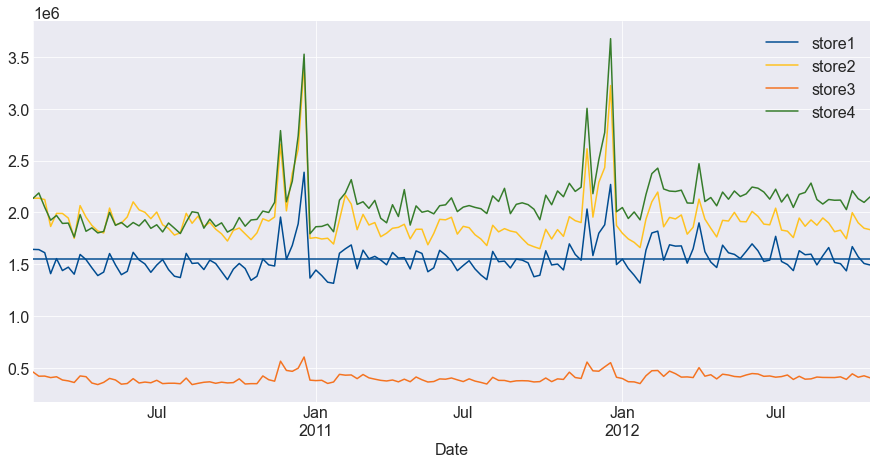

In [80]:
plt.figure(figsize = (15,7))
df[df.store_id == 1]['weekly_sales'].plot()
df[df.store_id == 2]['weekly_sales'].plot()
df[df.store_id == 3]['weekly_sales'].plot()
df[df.store_id == 4]['weekly_sales'].plot()
plt.axhline(df[df.store_id == 1]['weekly_sales'].mean())
plt.legend(['store1' , 'store2', 'store3', 'store4'])
plt.show()

In [138]:
df.store_id.max()

45

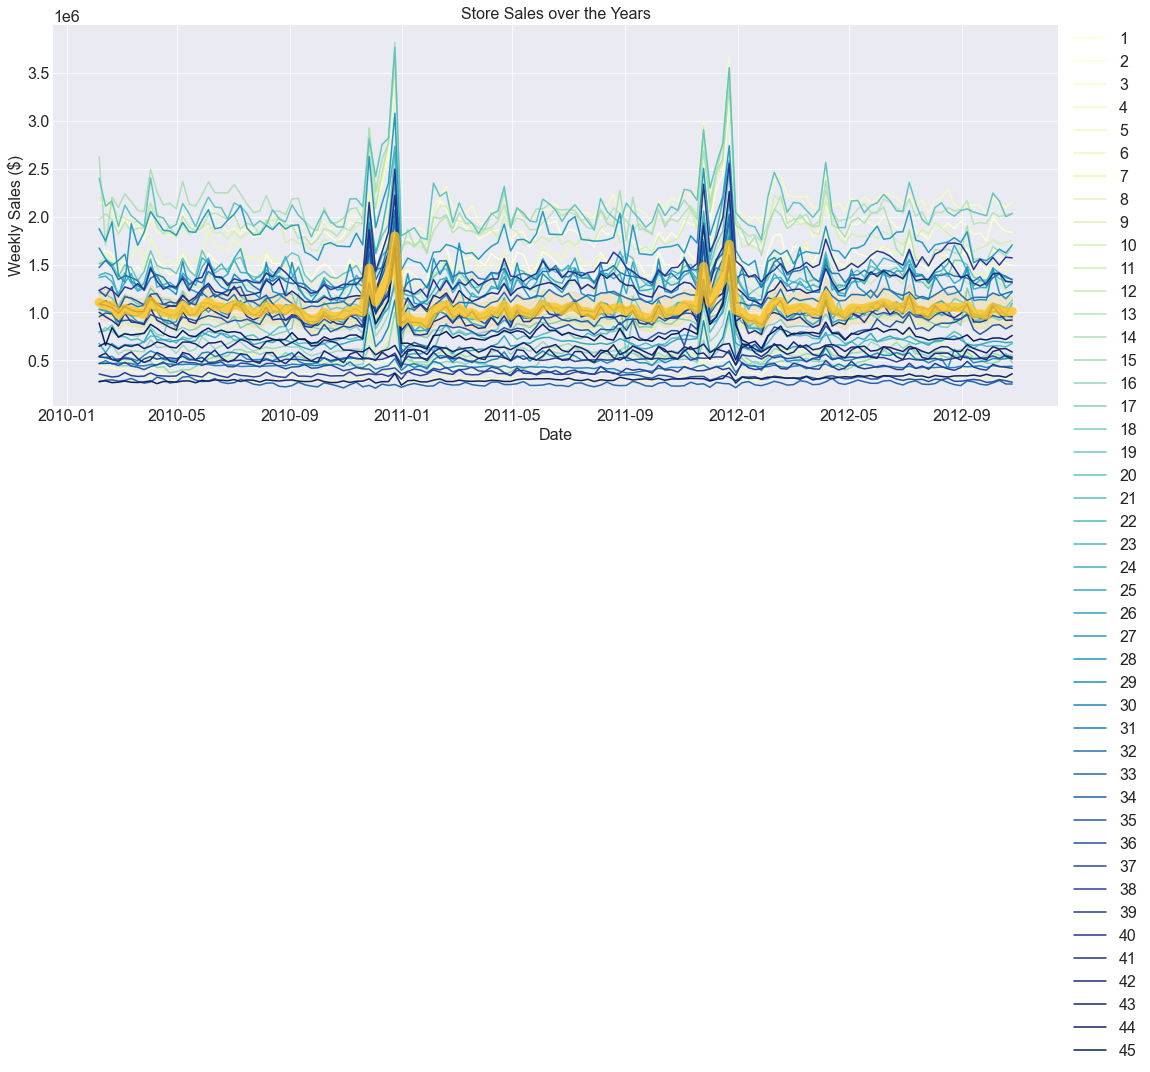

In [167]:
plt.figure(figsize = (18,7))
sns.lineplot(data = df, x = df.index, y = 'weekly_sales', hue = 'store_id', legend= 'full', palette = 'YlGnBu')
sns.lineplot(data = df, x = df.index, y = 'weekly_sales', estimator = 'mean', linewidth = 9, alpha = 0.8)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Store Sales over the Years', fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

plt.show()

## Do Gas Prices Have an Effect on Sales?

In [18]:
sales_n_fuel = df[['weekly_sales', 'fuel_price']]

In [19]:
sales_n_fuel.describe()

,weekly_sales,fuel_price
count,6.435000e+03,6435.000000
mean,1.046965e+06,3.358620
std,5.643666e+05,0.459097
min,2.099862e+05,2.470000
25%,5.533501e+05,2.930000
50%,9.607460e+05,3.440000
75%,1.420159e+06,3.740000
max,3.818686e+06,4.470000


In [38]:

       
df.loc[df.store_id == 1]

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,year,quarter,weekday,week_of_year,deflated_series,sales_delta,gas_delta,season,holiday_name
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42,2.57,211.096,8.106,A,151315,February,2010,1,Friday,5,7786.46,0.00,0.00,Winter,no_holiday
2010-02-12,1,1641957.44,1,38,2.55,211.242,8.106,A,151315,February,2010,1,Friday,6,7772.87,-1733.46,-0.02,Winter,super_bowl
2010-02-19,1,1611968.17,0,39,2.51,211.289,8.106,A,151315,February,2010,1,Friday,7,7629.21,-29989.27,-0.04,Winter,no_holiday
2010-02-26,1,1409727.59,0,46,2.56,211.320,8.106,A,151315,February,2010,1,Friday,8,6671.06,-202240.58,0.05,Winter,no_holiday
2010-03-05,1,1554806.68,0,46,2.62,211.350,8.106,A,151315,March,2010,1,Friday,9,7356.55,145079.09,0.06,Spring,no_holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76,3.67,222.982,6.908,A,151315,September,2012,3,Friday,39,6444.73,-69066.80,-0.05,Summer,no_holiday
2012-10-05,1,1670785.97,0,68,3.62,223.181,6.573,A,151315,October,2012,4,Friday,40,7486.24,233726.71,-0.05,Fall,no_holiday
2012-10-12,1,1573072.81,0,62,3.60,223.381,6.573,A,151315,October,2012,4,Friday,41,7042.11,-97713.16,-0.02,Fall,no_holiday


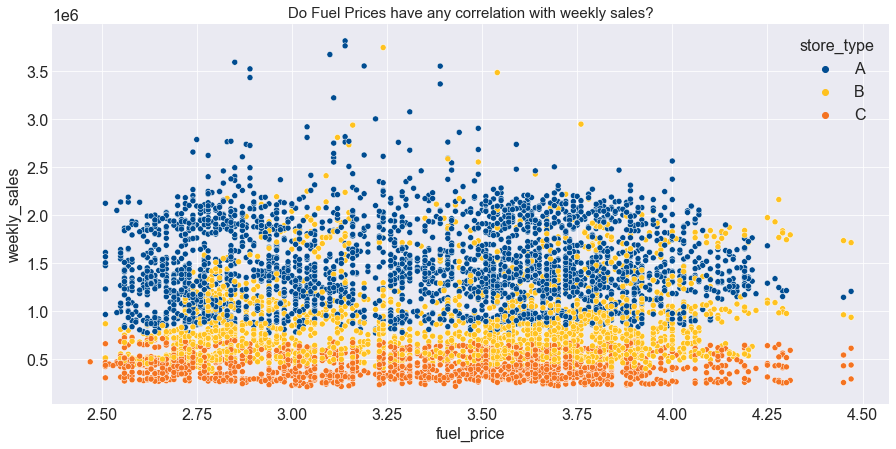

In [81]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, y = 'weekly_sales', x = 'fuel_price', hue = 'store_type' )
plt.title('Do Fuel Prices have any correlation with weekly sales?', fontsize = 15)
plt.show()

### Takeaways
After looking at this graph, even filtering for store size, it doesn't look like there's any sort of correlation between fuel prices and weekly sales. People appear to continue to shop no matter the price of gas.

Gas might end up being more of an indicator of the regions economic status.

### Multivariate Exploration

- Here I'll explore relationship between several variables, to try and spot trends. 

In [55]:
# create column list to look at for pairplot
cols = ['weekly_sales','temperature','fuel_price','CPI',
        'unemployment','store_type','store_size']

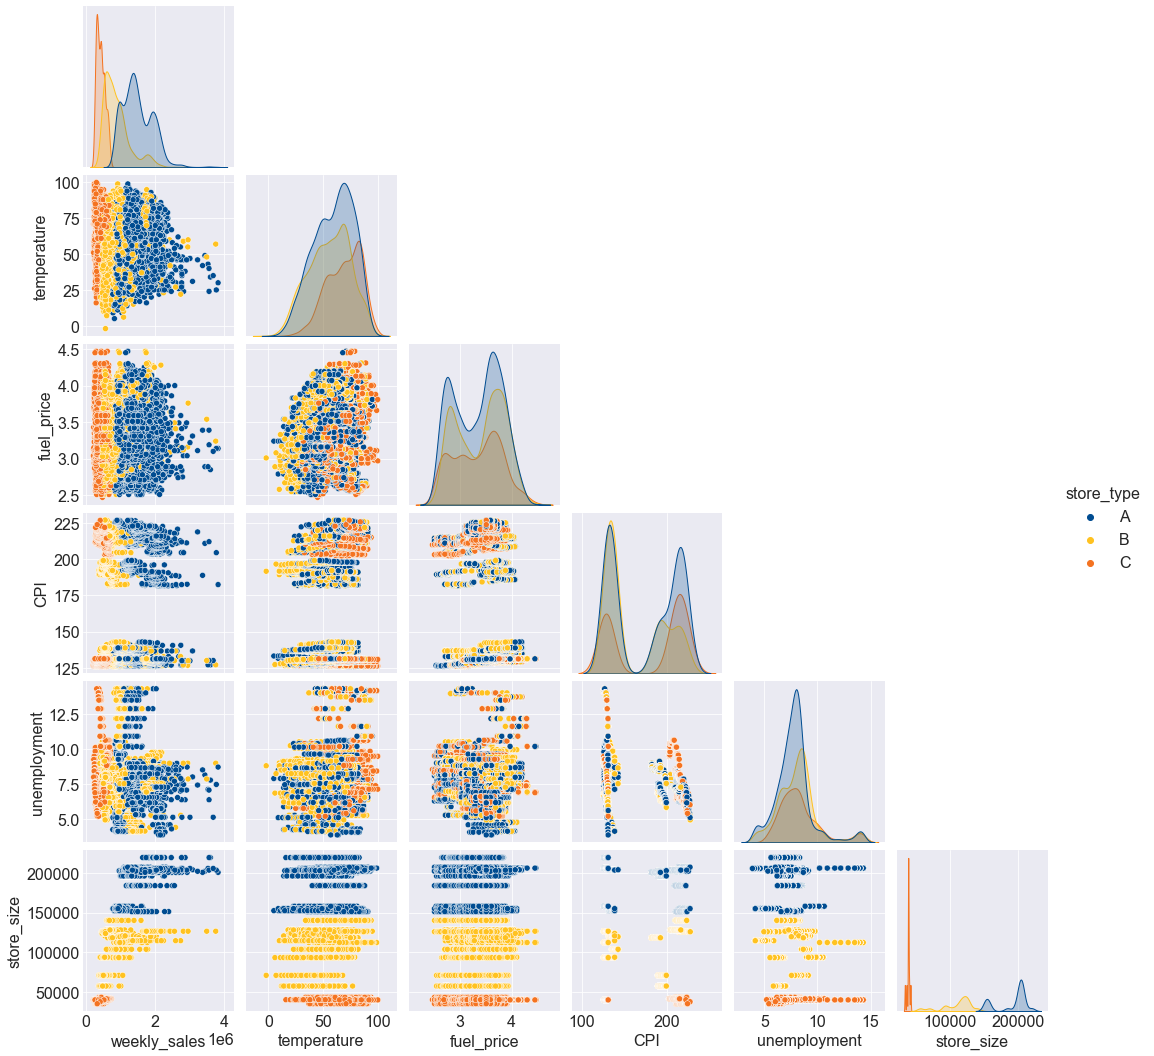

In [82]:
# create pairplot
sns.pairplot(data = df[cols], hue = 'store_type', corner=True)

### Takeaways

No trends really jump out at me right away. Biggest thing I notice is that when unemployment is higher, sales are lower. Maybe people are out of jobs and they're not shopping. Also it doesn't appear that there was much time where the unemployment *was* high during this time period here. (betwenen 2010 - 2012)

There is some gap in in CPI between 150 and 180 or so. Maybe there was some sort of jump in the market either up or down. 

Highest sales for the big stores (in blue), were when the temperature was in the 40s. 


### Are Unemployment and Weekly Sales Related

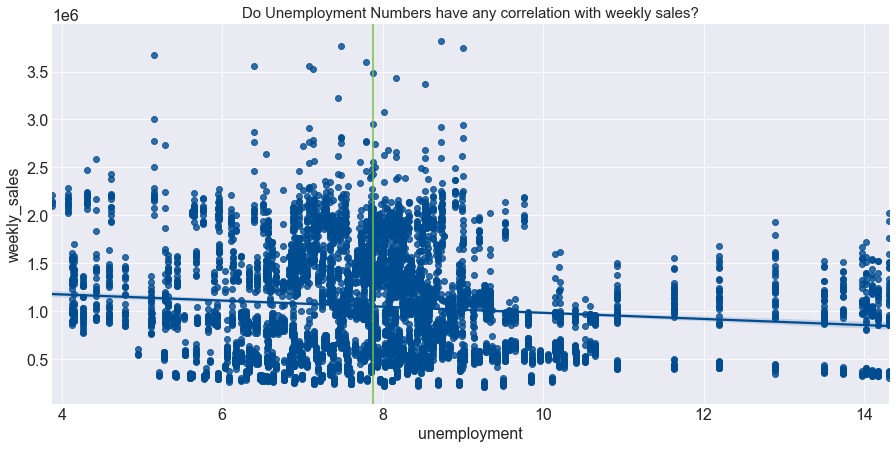

In [118]:
plt.figure(figsize = (15,7))
sns.regplot(data = df, y = 'weekly_sales', x = 'unemployment')
plt.axvline(x = df.unemployment.median(), color = '#76c043')
plt.title('Do Unemployment Numbers have any correlation with weekly sales?', fontsize = 15)
plt.show()

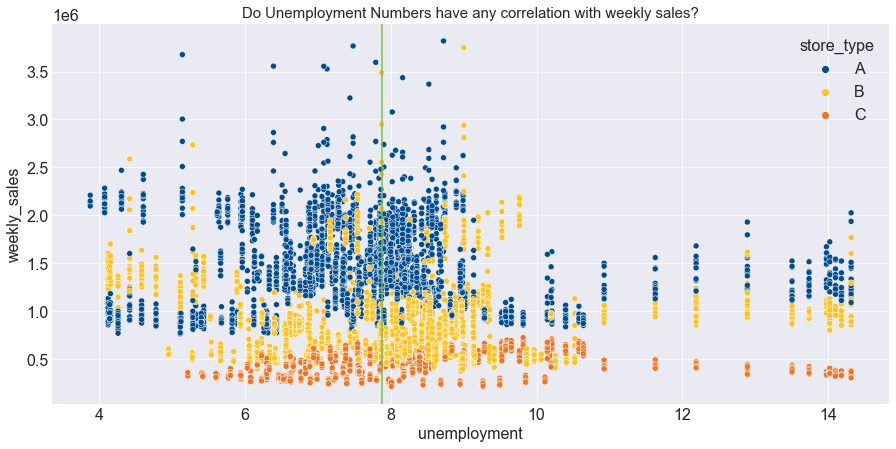

In [119]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, y = 'weekly_sales', x = 'unemployment', hue = 'store_type')
plt.axvline(x = df.unemployment.median(), color = '#76c043')
plt.title('Do Unemployment Numbers have any correlation with weekly sales?', fontsize = 15)
plt.show()

In [95]:
df.unemployment.median(), df.unemployment.mean()

(7.874, 7.9991510489510045)

In [104]:
list(df.store_type.unique())

['A', 'B', 'C']

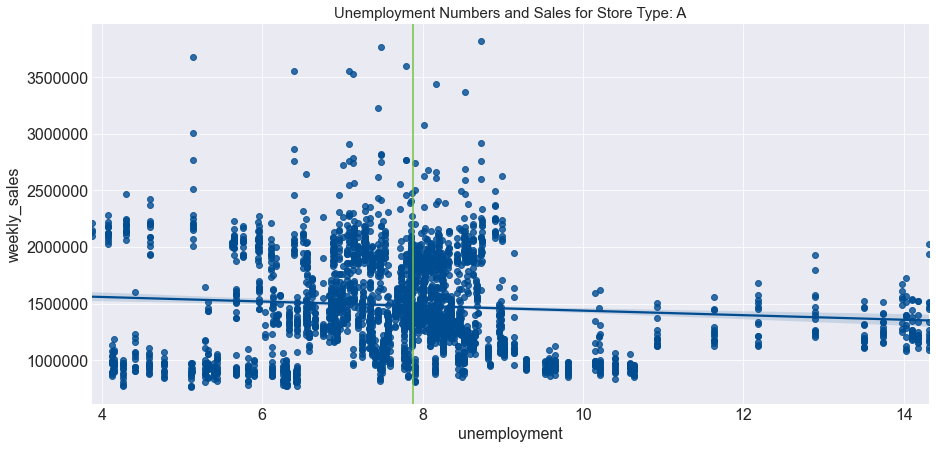

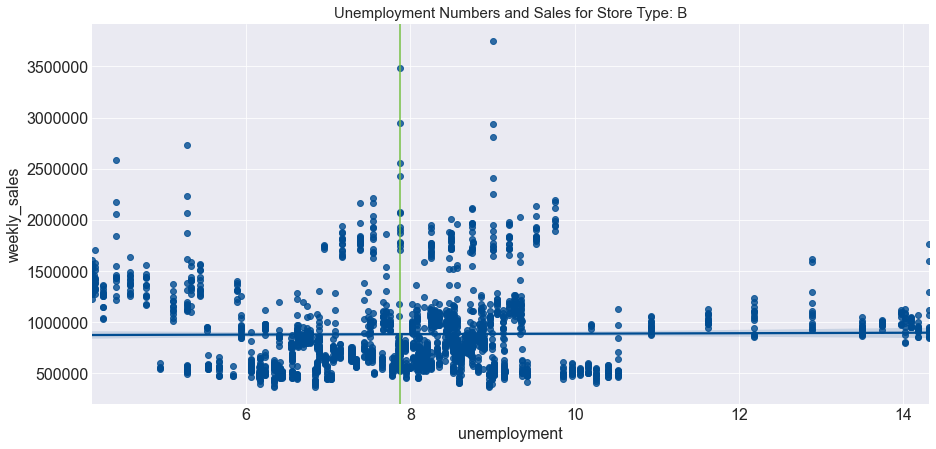

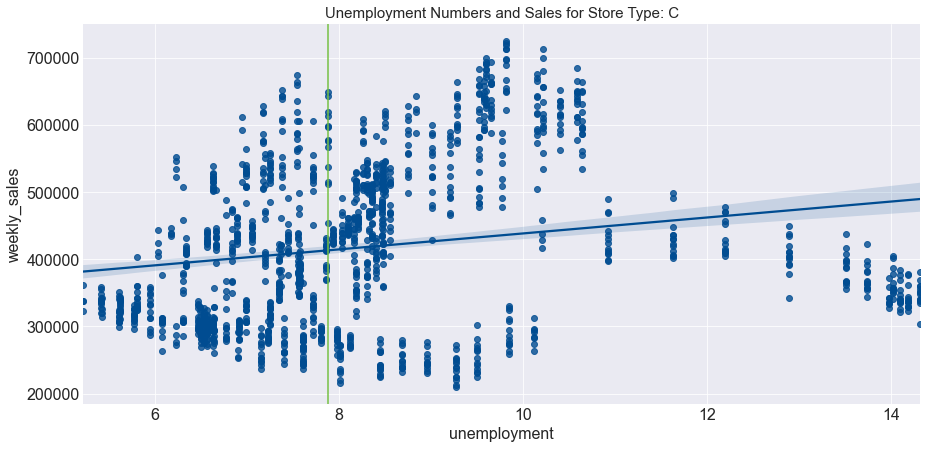

In [113]:
for store_type in list(df.store_type.unique()):
    plt.figure(figsize = (15,7))
    ax = sns.regplot(data = df.loc[df.store_type == store_type], y = 'weekly_sales', x = 'unemployment')
    plt.axvline(x = df.unemployment.median(), color = '#76c043')
    plt.title(f'Unemployment Numbers and Sales for Store Type: {store_type}', fontsize = 15)
    ax.ticklabel_format(useOffset=False, style='plain')
    plt.show()

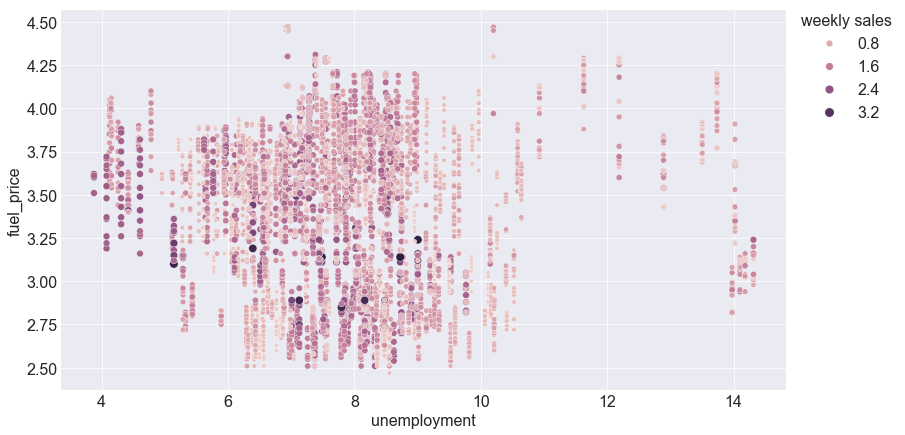

In [129]:
sns.scatterplot(data = df, x = 'unemployment', y = 'fuel_price', size = 'weekly_sales', hue = 'weekly_sales')
plt.legend(bbox_to_anchor = (1, 1.03), title = 'weekly sales')

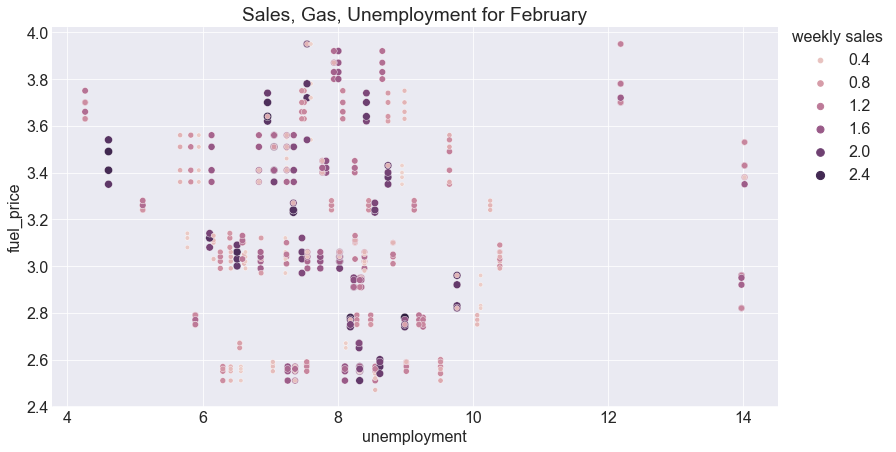

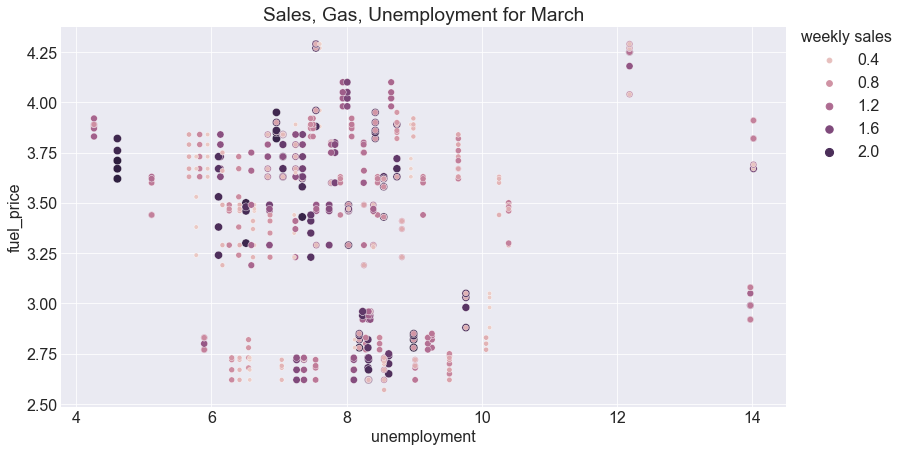

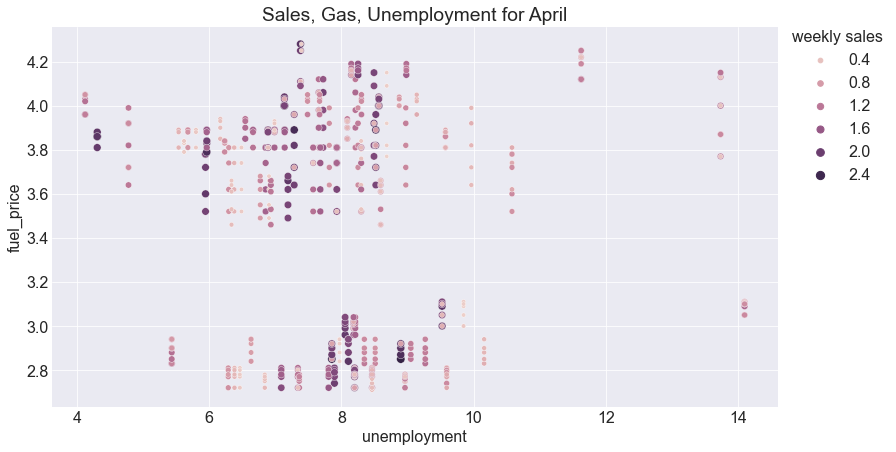

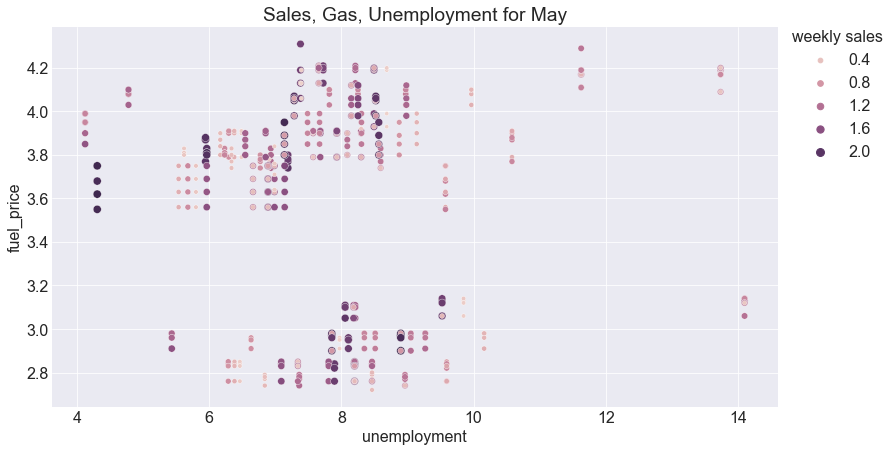

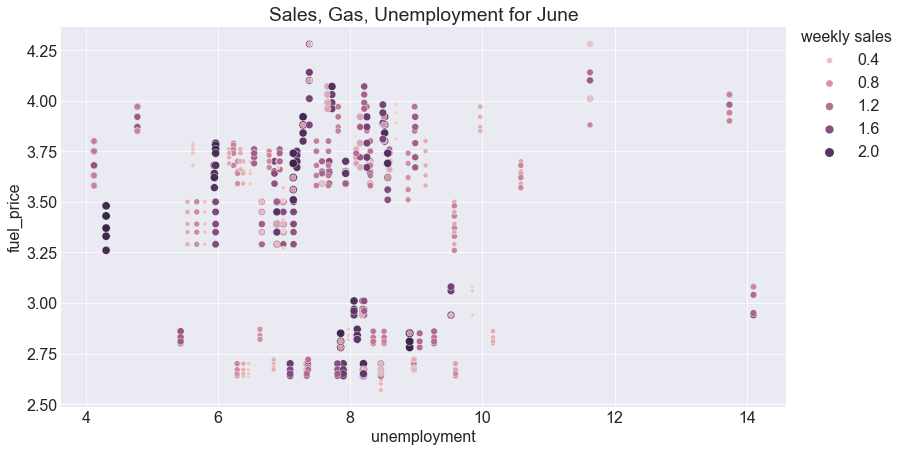

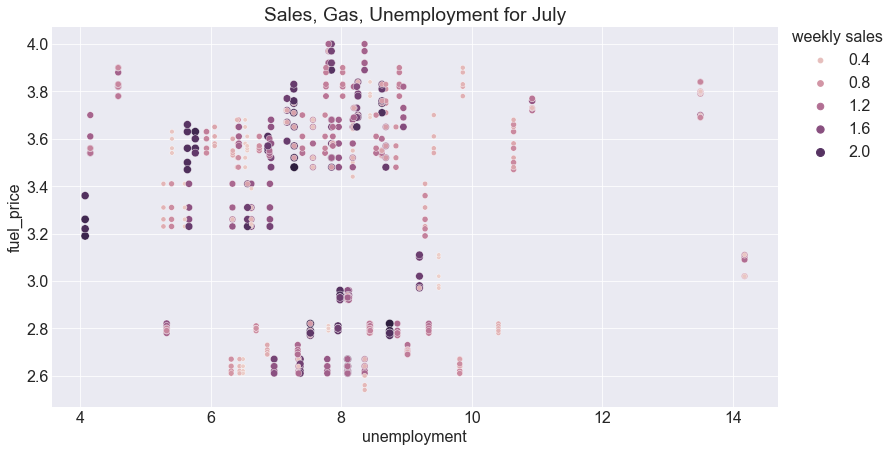

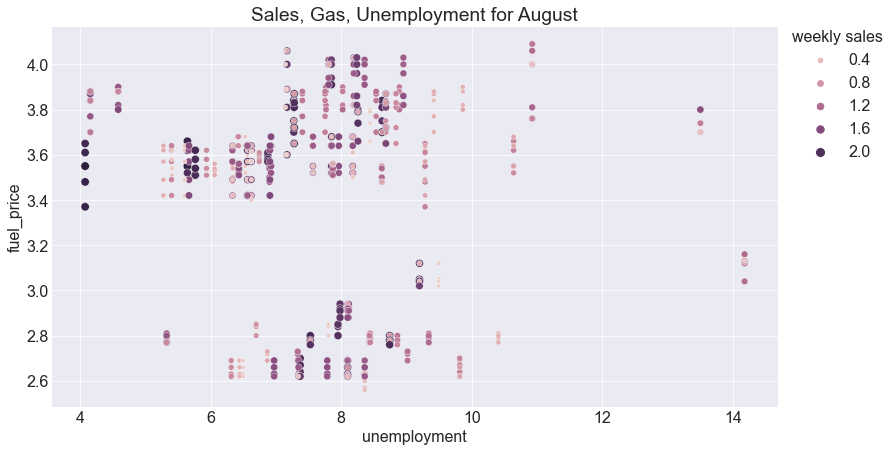

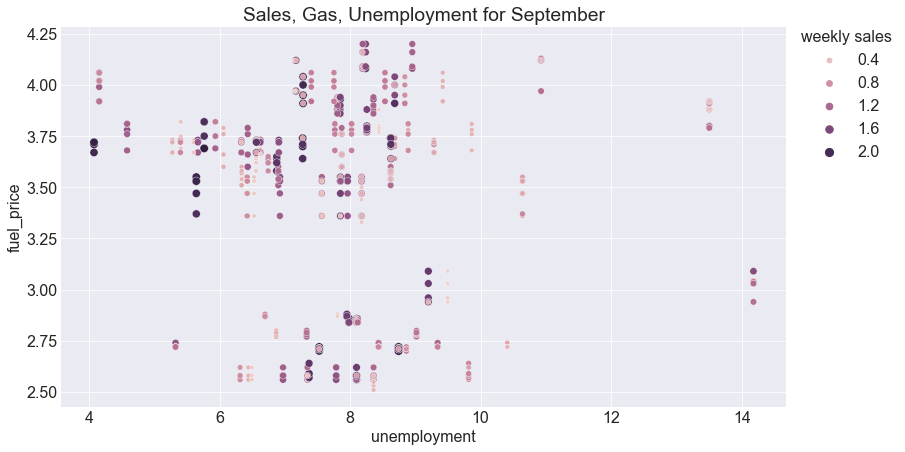

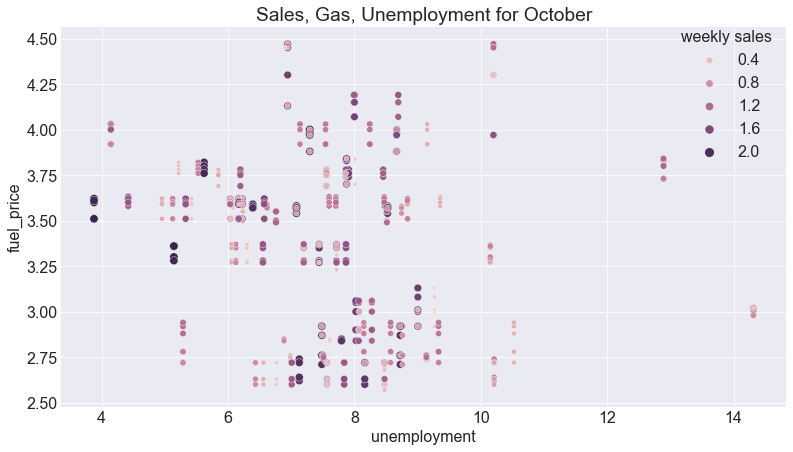

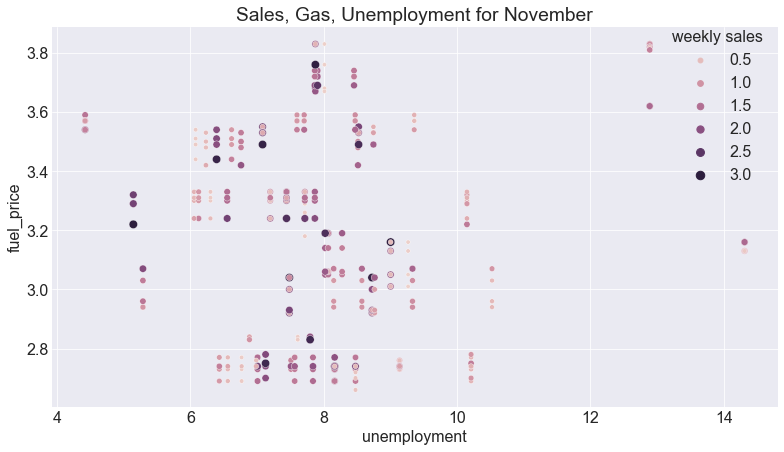

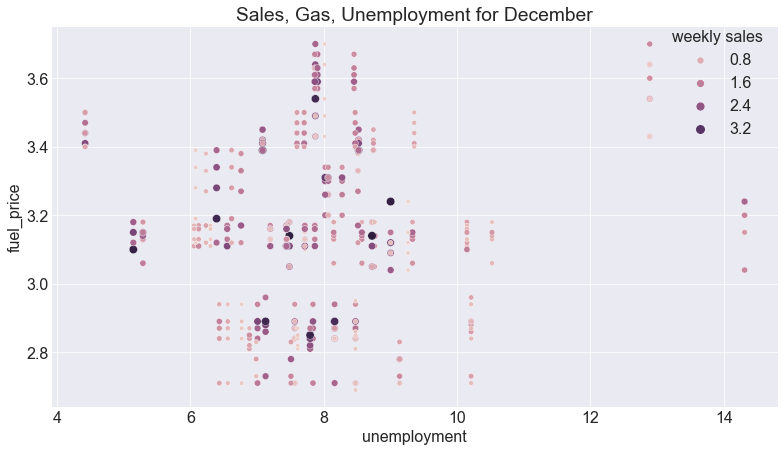

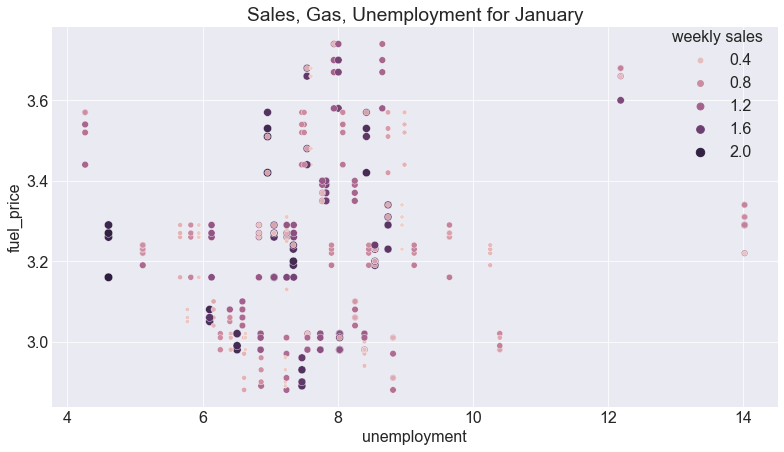

In [135]:
for month in list(df.month.unique()):
    sns.scatterplot(data = df.loc[df.month == month], x = 'unemployment', y = 'fuel_price', size = 'weekly_sales', hue = 'weekly_sales')
    plt.legend(bbox_to_anchor = (1, 1.03), title = 'weekly sales')
    plt.title(f'Sales, Gas, Unemployment for {month}')
    plt.show()

In [168]:
df.to_csv('full_walmart_data.csv')

------
### New Wrangle Testing 

In [4]:
new_df = w.wrangle_walmart()

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [6]:
new_df.last_week_sales

Date
2010-02-05           NaN
2010-02-05           NaN
2010-02-05           NaN
2010-02-05           NaN
2010-02-05           NaN
                 ...    
2012-10-26     685531.85
2012-10-26     313358.15
2012-10-26     918170.50
2012-10-26    1048706.75
2012-10-26     718125.53
Name: last_week_sales, Length: 6435, dtype: float64

In [7]:
new_df.last_year_sales.value_counts(dropna=False)

NaN           2340
635118.48        1
284322.52        1
1384209.22       1
829207.27        1
              ... 
514993.00        1
779602.36        1
1379651.87       1
1428218.27       1
2495489.25       1
Name: last_year_sales, Length: 4096, dtype: int64

In [8]:
#last year sales
#new_df['last_year_sales'] = new_df.groupby('store_id').weekly_sales.shift(52)
#last week sales
#df['last_week_sales'] = df.groupby('store_id').weekly_sales.shift(1)

<AxesSubplot:xlabel='Date'>

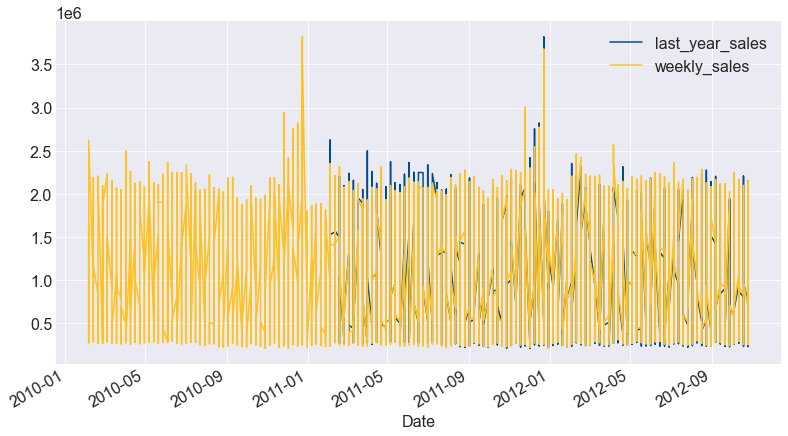

In [8]:
new_df[['last_year_sales', 'weekly_sales']].plot()

In [10]:
new_df[['last_year_sales', 'weekly_sales']]

,last_year_sales,weekly_sales
Date,,
2010-02-05,NaN,1643690.90
2010-02-05,NaN,2193048.75
2010-02-05,NaN,536006.73
2010-02-05,NaN,789036.02
2010-02-05,NaN,465108.52
...,...,...
2012-10-26,724443.97,688940.94
2012-10-26,307035.11,319550.77
2012-10-26,941675.95,921264.52


In [9]:
new_df[new_df.store_id == '3']

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,pre_christmas,tax_season,season,holiday_name,last_year_sales,last_week_sales,christmas,labor_day,super_bowl,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,3,461622.22,0,45,2.57,214.425,7.368,B,37392,February,...,0,0,Winter,no_holiday,NaN,NaN,0,0,0,0
2010-02-12,3,420728.96,1,47,2.55,214.575,7.368,B,37392,February,...,0,0,Winter,super_bowl,NaN,461622.22,0,0,1,0
2010-02-19,3,421642.19,0,47,2.51,214.620,7.368,B,37392,February,...,0,0,Winter,no_holiday,NaN,420728.96,0,0,0,0
2010-02-26,3,407204.86,0,52,2.56,214.648,7.368,B,37392,February,...,0,0,Winter,no_holiday,NaN,421642.19,0,0,0,0
2010-03-05,3,415202.04,0,53,2.62,214.675,7.368,B,37392,March,...,0,0,Spring,no_holiday,NaN,407204.86,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,3,389813.02,0,77,3.67,226.518,6.334,B,37392,September,...,0,0,Summer,no_holiday,368477.93,414392.09,0,0,0,0
2012-10-05,3,443557.65,0,72,3.62,226.721,6.034,B,37392,October,...,0,0,Fall,no_holiday,403342.40,389813.02,0,0,0,0
2012-10-12,3,410804.39,0,70,3.60,226.924,6.034,B,37392,October,...,0,0,Fall,no_holiday,368282.57,443557.65,0,0,0,0


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [11]:
new_df.christmas.value_counts()

0    6345
1      90
Name: christmas, dtype: int64

<AxesSubplot:xlabel='store_type', ylabel='store_size'>

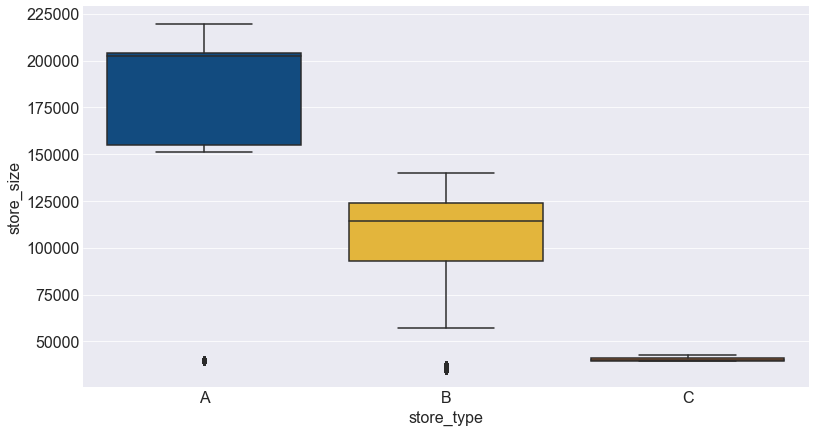

In [12]:
sns.boxplot(data = new_df, x = 'store_type', y = 'store_size')

In [18]:
new_df[new_df.store_type == 'A'].min()

store_id                       1
weekly_sales           209986.25
holiday_flag                   0
temperature                    5
fuel_price                  2.47
CPI                      126.064
unemployment               3.879
store_type                     A
store_size                 39690
month                      April
year                        2010
quarter                        1
weekday                   Friday
week_of_year                   1
deflated_series          1221.16
sales_delta_weekly   -2194969.99
sales_delta_yearly    -651629.29
gas_delta_weekly           -0.23
gas_delta_yearly           -0.37
pre_christmas                  0
tax_season                     0
season                      Fall
holiday_name           christmas
last_year_sales        209986.25
last_week_sales        209986.25
christmas                      0
labor_day                      0
super_bowl                     0
thanksgiving                   0
dtype: object

In [ ]:
new_df.loc[new39690